Wir nutzen immer die Definition der Vorlesung: Zu einem Spline gehört eine Knotenfolge $s_0,\ldots,s_m$.$s$ ist Spline der Ordnung $k$, falls $s|_{[s_l,s_{l+1})}\in {\cal P}_{k-1}$ und $s\in C^{(k-2)} (k\geq 2)$.

Beispiele für Splines sind die Funktionen $(s_i^+(x))^{(k-1)}=\max(x-s_i,0)^{(k-1)}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Splines der Ordnung 4 (Polynomgrad 3, kubisch)')

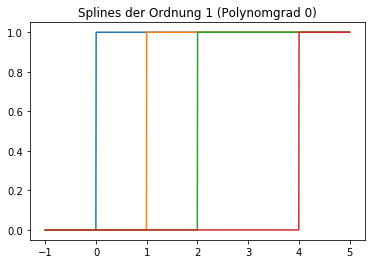

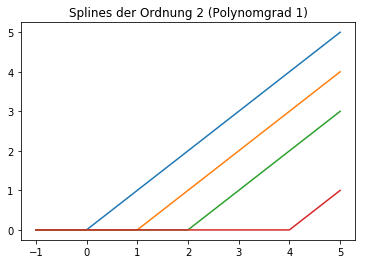

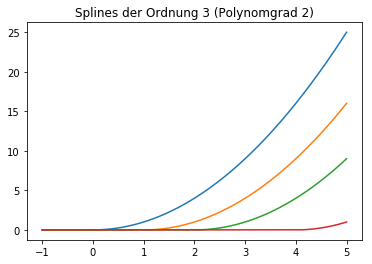

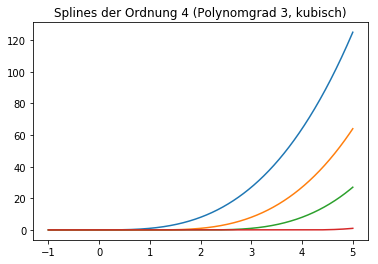

In [2]:
def plus(s,k,x):
    if (k==1):
        if (x<s):
            return 0
        else:
            return 1
    else:
        return max(x-s,0)**(k-1)

s=[0,1,2,4]
X=np.linspace(-1,5,1024)
Y0=[plus(s[0],1,w) for w in X]
Y1=[plus(s[1],1,w) for w in X]
Y2=[plus(s[2],1,w) for w in X]
Y3=[plus(s[3],1,w) for w in X]

plt.plot(X,Y0,X,Y1,X,Y2,X,Y3)
plt.title('Splines der Ordnung 1 (Polynomgrad 0)')
plt.figure()

Y0=[plus(s[0],2,w) for w in X]
Y1=[plus(s[1],2,w) for w in X]
Y2=[plus(s[2],2,w) for w in X]
Y3=[plus(s[3],2,w) for w in X]

plt.plot(X,Y0,X,Y1,X,Y2,X,Y3)
plt.title('Splines der Ordnung 2 (Polynomgrad 1)')
plt.figure()

Y0=[plus(s[0],3,w) for w in X]
Y1=[plus(s[1],3,w) for w in X]
Y2=[plus(s[2],3,w) for w in X]
Y3=[plus(s[3],3,w) for w in X]

plt.plot(X,Y0,X,Y1,X,Y2,X,Y3)
plt.title('Splines der Ordnung 3 (Polynomgrad 2)')
plt.figure()

Y0=[plus(s[0],4,w) for w in X]
Y1=[plus(s[1],4,w) for w in X]
Y2=[plus(s[2],4,w) for w in X]
Y3=[plus(s[3],4,w) for w in X]

plt.plot(X,Y0,X,Y1,X,Y2,X,Y3)
plt.title('Splines der Ordnung 4 (Polynomgrad 3, kubisch)')

# Splineberechnung durch Vandermonde-ähnliche Matrizen

Zusammen mit den Polynomen bilden diese Funktionen eine Basis des Splineraums (siehe Vorlesung). Wir berechnen nun einen interpolierenden Spline der Ordnung $k$ auf der Knotenfolge $s$ zunächst mit Hilfe einer Vandermonde (-ähnlichen) Matrix, dann mit Hilfe dieser Ansatzfunktionen.

Für Vandermonde: Wir müssen zunächst Stetigkeit/Differenzierbarkeit sicherstellen, dann können wir interpolieren. Als Beispiel nutzen wir eine äquidistante Knotenfolge auf $[-1,1]$ und das Rungebeispiel. Als Interpolationspunkte nutzen wir die Knoten selbst.

Text(0.5, 1.0, 'Spline der Ordnung 4 auf Knotenfolge der Länge 32')

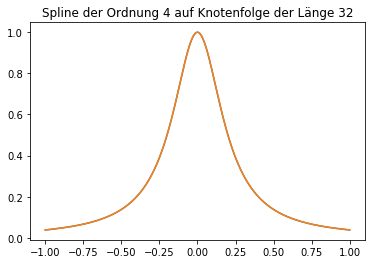

In [3]:
def runge(x):
    return 1/(1+25*x*x)

n=32
s=np.array(range(0,n+1))/n*2-1

# Splineordnung
k=4

#Gesamtzahl der Polynomkoeffizienten
N=k*n
A=np.zeros([N,N])
b=np.zeros(N)

# offene Freiheitsgrade
M=N-(n-1)*(k-1)
x=np.linspace(-1,1,M)
y=[runge(w) for w in x]

# Berechne zu einem gegebenen x das Intervall, in dem es liegt
def findinter(x):
    if (x<s[0]):
        return -1
    for i in range(0,n-1):
        if (x<s[i+1]):
            return i
    return n-1
    
num=0
#Glattheitsbedingungen.
# Für alle inneren Knoten
for j in range(1,n):
    # Für die Ableitungen von 0 bis k-2
    for l in range(0,k-1):
        # Für die Potenzen von 0 bis k-1
        for p in range (0,k):
            fak=1
            for q in range(p,p-l,-1):
                fak=fak*q
            if (fak>0):
                A[num,j*k+p]=fak*pow(s[j],(p-l))
                A[num,(j-1)*k+p]=-fak*pow(s[j],(p-l))
        num=num+1

# Interpolationsbedingungen
for i in range(0,M):
    w=x[i]
    j=findinter(w)
    for p in range(0,k):
        A[num,j*k+p]=pow(w,p)
    b[num]=y[i]
    num=num+1

# Splineauswertung
def splineval(x):
    j=findinter(x)
    val=0
    for p in range(0,k):
        val=val+pow(x,p)*coeff[j*k+p]
    return val

coeff=np.linalg.solve(A,b)
X=np.linspace(-1,1,1024)
Y=[splineval(w) for w in X]
Ytrue=[runge(w) for w in X]
plt.plot(X,Y,X,Ytrue)
plt.title('Spline der Ordnung '+str(k)+' auf Knotenfolge der Länge '+str(n))

Aufgabe: Ändern Sie die Anzahl der Intervalle und den Splinegrad und schauen Sie, was passiert.

# Splineberechnung durch Ansatzfunktionen

Alternativ können wir unsere Prototypen $(s_i^+)$ von oben zusammen mit den Polynomen als Ansatzfunktionen verwenden. In diesem Fall ist das Ergebnis automatisch in $C^{k-2}$. Die Berechnung ist dadurch natürlich viel einfacher, das Gleichungssystem, das gelöst werden muss, ist viel kleiner. Das Ergebnis ist natürlich dasselbe wie oben.

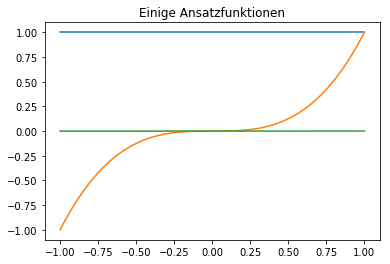

In [4]:
def ansatz(j,x):
    if (j<k):
        return x**j
    else:
        return plus(s[j-k+1],k,x)

Y=[ansatz(0,w) for w in X]
Y1=[ansatz(k-1,w) for w in X]
Y2=[ansatz(M-1,w) for w in X]

plt.plot(X,Y,X,Y1,X,Y2)
plt.title('Einige Ansatzfunktionen');

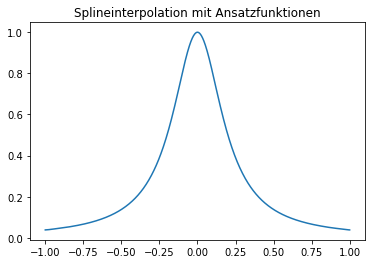

In [5]:
V=np.zeros([M,M])
y=np.array(y)
for i in range(0,M):
    for j in range(0,M):
        V[i,j]=ansatz(j,x[i])
coeff1=np.linalg.solve(V,y)

def ansatzeval(x):
    val=0
    for j in range(0,M):
        val=val+coeff1[j]*ansatz(j,x)
    return val

Y=[ansatzeval(w) for w in X]
plt.plot(X,Y)
plt.title('Splineinterpolation mit Ansatzfunktionen');

# B-Splines

B-Splines sind eine alternative Basis des Splineraums. Sie haben einen kleinen Träger, so dass das lineare Gleichungssystem noch einfacher zu lösen und die Gesamtfunktion noch einfacher auszurechnen ist.

In [8]:
def Bspline(i,k,x):
    l=len(s)

    if (k==1):
        l=len(s)
        if (x<s[0]):
            return 0
        if (x>s[l-1]):
            return 0
        for j in range(0,l-1):
            if (s[j+1]>x):
                break
        if (i==j):
            return 1
        else:
            return 0
    else:
        return (x-s[i])/(s[i+k-1]-s[i])*Bspline(i,k-1,x)+(s[i+k]-x)/(s[i+k]-s[i+1])*Bspline(i+1,k-1,x)

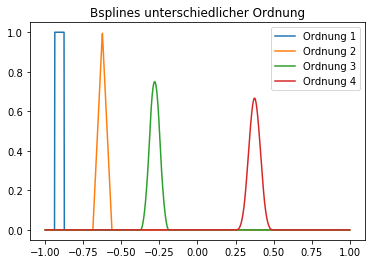

In [9]:
Y=[Bspline(1,1,w) for w in X]
Y1=[Bspline(5,2,w) for w in X]
Y2=[Bspline(10,3,w) for w in X]
Y3=[Bspline(20,4,w) for w in X]
plt.plot(X,Y,X,Y1,X,Y2,X,Y3)
plt.title('Bsplines unterschiedlicher Ordnung')
plt.legend(['Ordnung 1','Ordnung 2','Ordnung 3','Ordnung 4']);